In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

data_dir = '/content/drive/MyDrive/comment-labels'

# List all CSV files in the directory
csv_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]

# Initialize an empty list to store dataframes
df_list = []

# Loop through each CSV file and append its content to the list
for file in csv_files:
    print(file)
    df = pd.read_csv(file, on_bad_lines='skip')
    df_list.append(df)

# Concatenate all dataframes into a single dataframe
label_df = pd.concat(df_list, ignore_index=True)

# Display the first 5 rows of the combined dataframe
display(label_df.head())


/content/drive/MyDrive/comment-labels/batch_00002.csv
/content/drive/MyDrive/comment-labels/batch_00001.csv
/content/drive/MyDrive/comment-labels/batch_00000.csv
/content/drive/MyDrive/comment-labels/batch_00003.csv
/content/drive/MyDrive/comment-labels/batch_00006.csv
/content/drive/MyDrive/comment-labels/batch_00004.csv
/content/drive/MyDrive/comment-labels/batch_00005.csv
/content/drive/MyDrive/comment-labels/batch_00007.csv
/content/drive/MyDrive/comment-labels/batch_00011.csv
/content/drive/MyDrive/comment-labels/batch_00008.csv
/content/drive/MyDrive/comment-labels/batch_00010.csv
/content/drive/MyDrive/comment-labels/batch_00009.csv
/content/drive/MyDrive/comment-labels/batch_00012.csv
/content/drive/MyDrive/comment-labels/batch_00013.csv
/content/drive/MyDrive/comment-labels/batch_00014.csv
/content/drive/MyDrive/comment-labels/batch_00015.csv
/content/drive/MyDrive/comment-labels/batch_00018.csv
/content/drive/MyDrive/comment-labels/batch_00016.csv
/content/drive/MyDrive/comme

,comment_id,intent
0,2a9bc5ccf641,question
1,9541ba0171d8,praise
2,f1f25acaed24,humor
3,6640de177bd3,other
4,1415a4857fda,suggestion


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/checkpoint-comments-sampled.csv")

df = df.merge(
    label_df[["comment_id", "intent"]].rename(columns={"intent": "intent_label"}),
    on="comment_id",
    how="left"
)

In [ ]:
allowed = ["suggestion", "question", "praise", "criticism", "humor", "other"]

df = df[df["intent_label"].isin(allowed)]

<Axes: title={'center': 'Intent Distribution'}, ylabel='count'>

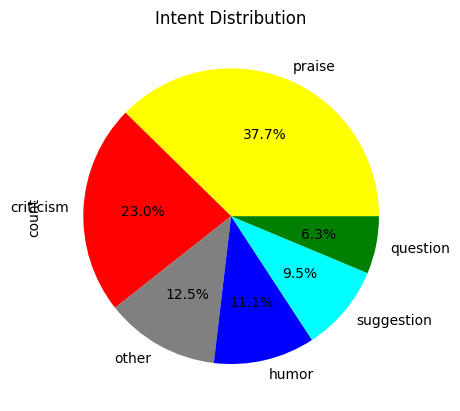

In [ ]:
df['intent_label'].value_counts().plot.pie(autopct='%1.1f%%', colors=["yellow", "red", "grey", "blue", "cyan", "green"], title="Intent Distribution")

<Axes: title={'center': 'Sentiment Distribution'}, ylabel='count'>

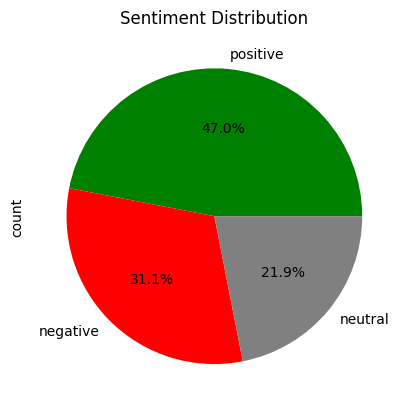

In [ ]:
df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', colors=["green", "red", "grey"], title="Sentiment Distribution")

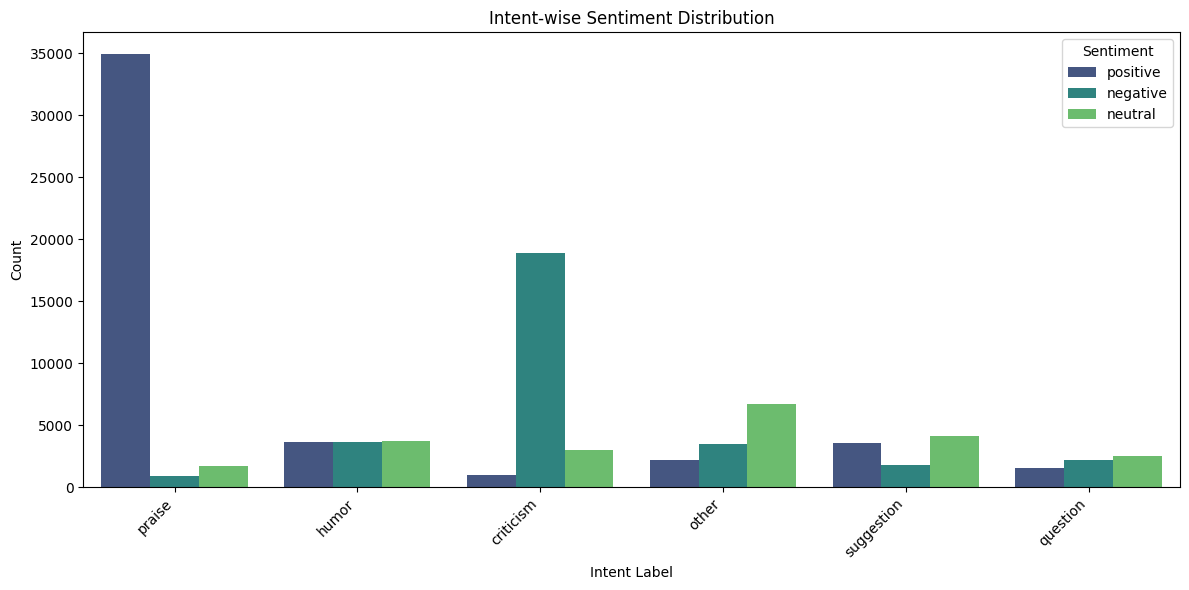

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='intent_label', hue='sentiment_label', palette='viridis')
plt.title('Intent-wise Sentiment Distribution')
plt.xlabel('Intent Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()




In [ ]:
df.to_csv("/content/drive/MyDrive/checkpoint-comments-labelled.csv")